# **Day-5**

## **Improvements in Previous Pipeline**

1. Building the neural network using nn module
2. Using built-in activation function
3. Using built-in loss function
4. Using built-in optimizer

## **The NN Module**

The torch.nn module in PyTorch is a core library that provides a wide array of classes and
functions designed to help developers build neural networks efficiently and effectively.
It
abstracts the complexity of creating and training neural networks by offering pre-built layers,
loss functions, activation functions, and other utilities, enabling you to focus on designing and
experimenting with model architectures.

### **Key Components of torch.nn:**
1. **Modules (Layers):**
    - *nn.Module :* The base class for all neural network modules. Your custom models and layers should subclass this class.

    - Common Layers : Includes layers like *nn.Linear* (fully connected layer), *nn.Conv2d*(convolutional layer), *nn.LSTM* (recurrent layer), and many others.

2. **Activation Functions:**
    - Functions like *nn.ReLU, nn.Sigmoid,* and *nn.Tanh* introduce non-linearities to the model, allowing it to learn complex patterns.

3. **Loss Functions:**
    - Provides loss functions such as *nn.CrossEntropyLoss, nn.MSELoss,* and *nn.NLLLoss* to quantify the difference between the model's predictions and the actual targets.

4. **Container Modules:**
    - *nn.Sequential :* A sequential container to stack layers in order.

5. **Regularization and Dropout:**
    - Layers like *nn.Dropout* and *nn.BatchNorm2d* help prevent overfitting and improve the model's ability to generalize to new data.

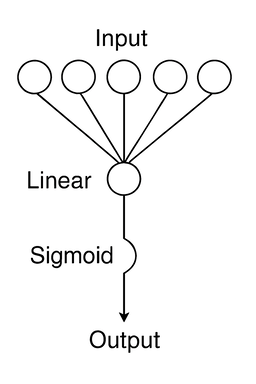

In [92]:
import torch                     # imports PyTorch library
import torch.nn as nn            # imports neural network module from PyTorch

class Model(nn.Module):          # defines a model class that inherits from nn.Module
  def __init__(self, num_features):   # constructor that takes number of input features

    super().__init__()                # initializes the parent nn.Module class

    self.linear = nn.Linear(num_features, 1)   # creates a linear layer (input → output)
    self.sigmoid = nn.Sigmoid()               # creates a sigmoid activation function


  def forward(self, features):          # defines how data moves through the model
    out = self.linear(features)         # step 1: compute z = XW + b
    out = self.sigmoid(out)             # step 2: apply sigmoid activation
    return out                          # return final predictions


---

#### **1. `super().__init__()`**

This line tells Python to run the setup code of the parent class (`nn.Module`).
It is required because PyTorch models must be properly initialized by the `nn.Module` class before you add layers.

Think of it like saying:
*"Before I add my own layers, let PyTorch set up everything it needs for a model."*

---

#### **2. `self.linear = nn.Linear(num_features, 1)`**

This creates a **linear layer**.
A linear layer does the math:

```
output = (input × weights) + bias
```

* `num_features` = how many input numbers your model receives
* `1` = the model gives 1 output value

This is basically the **brain** of your simple model.

---

#### **3. `self.sigmoid = nn.Sigmoid()`**

This creates a **sigmoid activation function**.
The sigmoid takes any number and turns it into a value between **0 and 1**.
So it converts the output into a **probability**.

Used when your model predicts something like *yes/no*, *0/1*, *true/false*.

---



In [93]:
# create a dataset

feature = torch.rand(10, 5)
# This creates a random tensor with shape (10, 5).
# Meaning: we have 10 data samples/rows, and each sample has 5 features/columns.
# We use 5 columns because the model expects 5 input features for each sample.
# Values are random numbers between 0 and 1 (torch.rand generates them).


# create a model
model = Model(feature.shape[1])
# We create an object of the Model class.
# The model needs to know how many features are going into it.
# feature.shape[1] means "take the number of columns in the dataset" → which is 5.
# Instead of manually writing 5, we read it directly from data so the code works even if data shape changes.
# So this Model will expect 5 input values for every data row.


# call the model for forward pass
y_pred = model(feature)
# We pass the dataset to the model to get predictions.
# This runs the model's forward function internally.
# We CAN manually call model.forward(feature), but the recommended way is model(feature)
# because PyTorch does extra internal work (hooks, layers, training/eval behavior).
# So model(feature) is the clean and correct way to get the forward pass.

# we get forward pass and get y_pred
# y_pred will contain the output of the model for all 10 samples.
# Since the model has a sigmoid at the end, values will be between 0 and 1 (probabilities).
y_pred


tensor([[0.5513],
        [0.4936],
        [0.6064],
        [0.6121],
        [0.6458],
        [0.5743],
        [0.5398],
        [0.5657],
        [0.5108],
        [0.4971]], grad_fn=<SigmoidBackward0>)

In [94]:
# show model weights
model.linear.weight
# 'model.linear' refers to the Linear layer we created in the Model class.
# Since our model has 5 input features and 1 output unit, the shape of weights will be (1, 5).
# Right now (before training), they are random values initialized by PyTorch.


Parameter containing:
tensor([[ 0.2383, -0.4420, -0.3951,  0.4130,  0.3419]], requires_grad=True)

In [95]:
# show bias of model
model.linear.bias
# Every Linear layer has exactly one bias value for each output unit.
# Before training, PyTorch initializes this bias randomly (usually small values).


Parameter containing:
tensor([0.2557], requires_grad=True)

### **To Visualize the Graph**

In [96]:
! pip install torchinfo

In [97]:
from torchinfo import summary
summary(model, input_size = (10,5)) # model and input size

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

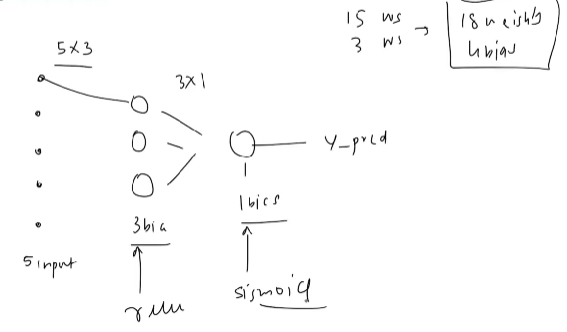


In [98]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, num_features):

    super().__init__()

    self.linear1 = nn.Linear(num_features, 3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3, 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out


In [99]:
# create a dataset
feature = torch.rand(10, 5)

# create a model
model = Model(feature.shape[1])

# call the model for forward pass
y_pred = model(feature)

y_pred

tensor([[0.5396],
        [0.5654],
        [0.5745],
        [0.5869],
        [0.5515],
        [0.5283],
        [0.5550],
        [0.5659],
        [0.5438],
        [0.5837]], grad_fn=<SigmoidBackward0>)

In [100]:
# show model weights of first layer
model.linear1.weight

Parameter containing:
tensor([[ 0.0856, -0.4423,  0.4158,  0.1650,  0.3491],
        [-0.0568,  0.1076, -0.1313,  0.3811,  0.1358],
        [ 0.3802,  0.3755, -0.2268, -0.0847, -0.1593]], requires_grad=True)

In [101]:
# show model weights second layer
model.linear2.weight

Parameter containing:
tensor([[ 0.1468, -0.5104,  0.0780]], requires_grad=True)

In [102]:
# show bias of model first layer
model.linear1.bias

Parameter containing:
tensor([0.2574, 0.1521, 0.4186], requires_grad=True)

In [103]:
# show bias of model second layer
model.linear2.bias

Parameter containing:
tensor([0.2932], requires_grad=True)

In [104]:
# Visualization
from torchinfo import summary
summary(model, input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### **we define NN architecture and it can be hell big so, in forward function we have to pass our features each layer and this is hetic and can be simplified via Containers**

### we will use **sequential containers**

In [105]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, num_features):

    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(num_features, 3),
        nn.ReLU()  ,
        nn.Linear(3, 1),
        nn.Sigmoid() ,
    )


  def forward(self, features):
    out = self.network(feature)
    return out


# **Changing the Day-4 Neural Network Pipeline**

In [106]:
#imports
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [108]:
df.drop(columns = ["id", "Unnamed: 32"], inplace=True) # remove unwanted columns

In [109]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (455, 30) (455,)
Test shape: (114, 30) (114,)


In [110]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [111]:
#encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [112]:
#Numpy -> Tensor
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [113]:
# Defining a simple neural network class
class MySimpleNN(nn.Module):
    def __init__(self, num_features):

      super().__init__()
      self.linear = nn.Linear(num_features, 1)
      self.sigmoid = nn.Sigmoid()


    # USING BUILD-IN ACTIVATION FUNCTION
    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out


    def binary_cross_entropy(self, y_pred, y):
        # small constant to avoid log(0) errors
        epsilon = 1e-7

        # keep predictions within safe range (between epsilon and 1 - epsilon)
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

        # calculate binary cross-entropy loss (average difference between true and predicted)
        loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
        return loss


In [114]:
learning_rate = 0.1
epochs = 25

In [115]:
model = MySimpleNN(X_train_tensor.shape[1])


# define training loop
for epoch in range(epochs):


    y_pred = model(X_train_tensor) # FORWARD PROPOGATION

    # calculate loss between predicted values and actual labels
    loss = model.binary_cross_entropy(y_pred, y_train_tensor)

    # backward pass:
    loss.backward()

    # update weights and bias manually using gradient descent
    with torch.no_grad():  # disable gradient tracking during update
        model.linear.weight -= learning_rate * model.linear.weight.grad  # update weights
        model.linear.bias -= learning_rate * model.linear.bias.grad        # update bias (note: small typo fixed here)

    # reset gradients to zero before next iteration (to avoid accumulation)
    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()

    # print loss for each epoch to monitor training progress
    print(f"epoch: {epoch+1}, loss: {loss.item()}")


epoch: 1, loss: 0.7411231994628906
epoch: 2, loss: 0.7222755551338196
epoch: 3, loss: 0.710858166217804
epoch: 4, loss: 0.7036925554275513
epoch: 5, loss: 0.6988601088523865
epoch: 6, loss: 0.6952985525131226
epoch: 7, loss: 0.6924468874931335
epoch: 8, loss: 0.6900155544281006
epoch: 9, loss: 0.6878554821014404
epoch: 10, loss: 0.6858892440795898
epoch: 11, loss: 0.6840748190879822
epoch: 12, loss: 0.6823880672454834
epoch: 13, loss: 0.6808136701583862
epoch: 14, loss: 0.6793413162231445
epoch: 15, loss: 0.6779624223709106
epoch: 16, loss: 0.6766703128814697
epoch: 17, loss: 0.6754589080810547
epoch: 18, loss: 0.6743227243423462
epoch: 19, loss: 0.6732567548751831
epoch: 20, loss: 0.6722564697265625
epoch: 21, loss: 0.6713173389434814
epoch: 22, loss: 0.6704355478286743
epoch: 23, loss: 0.6696072220802307
epoch: 24, loss: 0.6688289642333984
epoch: 25, loss: 0.6680973768234253


In [116]:
model.linear.weight

Parameter containing:
tensor([[ 0.0729, -0.0950, -0.1130,  0.0132,  0.0840,  0.0106, -0.0960, -0.0512,
         -0.0639,  0.0180, -0.1368, -0.0504,  0.0813,  0.0878,  0.0401, -0.0501,
          0.0686,  0.0437, -0.0220,  0.0769,  0.0701,  0.0745, -0.0611,  0.0719,
          0.0836, -0.0315, -0.1157,  0.1376, -0.0815, -0.0201]],
       requires_grad=True)

In [117]:
# model evaluation (testing phase)
with torch.no_grad():
    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5846414566040039


## **Above we are using manually written loss function Now we will use Built-in Loss Function**

In [118]:
# Defining a simple neural network class
class MySimpleNN(nn.Module):
    def __init__(self, num_features):

      super().__init__()
      self.linear = nn.Linear(num_features, 1)
      self.sigmoid = nn.Sigmoid()


    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out

    # remove loss function


In [119]:
# Defining a simple neural network class
class MySimpleNN(nn.Module):
    def __init__(self, num_features):

      super().__init__()
      self.linear = nn.Linear(num_features, 1)
      self.sigmoid = nn.Sigmoid()


    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out

In [120]:
learning_rate = 0.1
epochs = 25

In [121]:
loss_function = nn.BCELoss() # Using Built-In Loss Function

In [122]:
model = MySimpleNN(X_train_tensor.shape[1])


# define training loop
for epoch in range(epochs):


    y_pred = model(X_train_tensor)

    # calculate loss between predicted values and actual labels
    loss = loss_function(y_pred, y_train_tensor.view(-1,1)) # calling the builtin loss function [ .VIEW(-1,1) TO FIX SIZE ]

    # backward pass: compute gradients (derivatives of loss w.r.t weights & bias)
    loss.backward()

    # update weights and bias manually using gradient descent
    with torch.no_grad():  # disable gradient tracking during update
        model.linear.weight -= learning_rate * model.linear.weight.grad  # update weights
        model.linear.bias -= learning_rate * model.linear.bias.grad        # update bias (note: small typo fixed here)

    # reset gradients to zero before next iteration (to avoid accumulation)
    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()

    # print loss for each epoch to monitor training progress
    print(f"epoch: {epoch+1}, loss: {loss.item()}")


epoch: 1, loss: 0.8648546934127808
epoch: 2, loss: 0.6213600635528564
epoch: 3, loss: 0.5001454949378967
epoch: 4, loss: 0.43003982305526733
epoch: 5, loss: 0.38324403762817383
epoch: 6, loss: 0.3491974174976349
epoch: 7, loss: 0.3230034410953522
epoch: 8, loss: 0.3020470440387726
epoch: 9, loss: 0.2847893536090851
epoch: 10, loss: 0.2702585458755493
epoch: 11, loss: 0.2578066289424896
epoch: 12, loss: 0.24698308110237122
epoch: 13, loss: 0.2374633550643921
epoch: 14, loss: 0.22900693118572235
epoch: 15, loss: 0.22143125534057617
epoch: 16, loss: 0.21459491550922394
epoch: 17, loss: 0.2083863615989685
epoch: 18, loss: 0.20271624624729156
epoch: 19, loss: 0.19751206040382385
epoch: 20, loss: 0.19271418452262878
epoch: 21, loss: 0.18827320635318756
epoch: 22, loss: 0.18414762616157532
epoch: 23, loss: 0.18030239641666412
epoch: 24, loss: 0.1767076551914215
epoch: 25, loss: 0.17333778738975525


## **The torch.optim module**

   #### - torch.optim is a module in PyTorch that provides a variety of optimization algorithms used to update the parameters of your model during training.
   #### - It includes common optimizers like Stochastic Gradient Descent (SGD), Adam,RMSprop, and more.
   #### - It handles weight updates efficiently, including additional features like learning rate scheduling and weight decay (regularization).

---

   #### - The model.parameters() method in PyTorch retrieves an iterator over all the trainable parameters (weights and biases) in a model. These parameters are instances of torch.nn.Parameter and include:

        • Weights: The weight matrices of layers like nn.Linear, nn.Conv2d, etc.
        • Biases: The bias terms of layers (if they exist).
   #### - The optimizer uses these parameters to compute gradients and update them during training.

## **Using Built-In Optimization - Best Code**

In [123]:
  # Defining a simple neural network class
class MySimpleNN(nn.Module):
    def __init__(self, num_features):

      super().__init__() #BUILD-IN ACTIVATION FN
      self.linear = nn.Linear(num_features, 1)
      self.sigmoid = nn.Sigmoid()


    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out

    # remove loss function

In [124]:
learning_rate = 0.1
epochs = 25

In [125]:
loss_function = nn.BCELoss() # Using Built-In Loss Function

In [126]:
model = MySimpleNN(X_train_tensor.shape[1])

#making BUILD-IN OPTIMIZER
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate) # send all weights and bias

# define training loop
for epoch in range(epochs):


    y_pred = model(X_train_tensor)

    # calculate loss between predicted values and actual labels
    loss = loss_function(y_pred, y_train_tensor.view(-1,1)) # calling the builtin loss function


    # reset gradients to zero before next iteration (to avoid accumulation)
    optimizer.zero_grad()

    # backward pass: compute gradients (derivatives of loss w.r.t weights & bias)
    loss.backward()

    # update weights and bias AUTOMATICALLY
    optimizer.step()



    # print loss for each epoch to monitor training progress
    print(f"epoch: {epoch+1}, loss: {loss.item()}")


epoch: 1, loss: 0.6447260975837708
epoch: 2, loss: 0.5017461180686951
epoch: 3, loss: 0.42474910616874695
epoch: 4, loss: 0.3764630854129791
epoch: 5, loss: 0.3426213562488556
epoch: 6, loss: 0.317130982875824
epoch: 7, loss: 0.29696956276893616
epoch: 8, loss: 0.28045788407325745
epoch: 9, loss: 0.2665802240371704
epoch: 10, loss: 0.2546807825565338
epoch: 11, loss: 0.24431441724300385
epoch: 12, loss: 0.23516684770584106
epoch: 13, loss: 0.22700875997543335
epoch: 14, loss: 0.21966831386089325
epoch: 15, loss: 0.21301378309726715
epoch: 16, loss: 0.20694224536418915
epoch: 17, loss: 0.20137183368206024
epoch: 18, loss: 0.19623655080795288
epoch: 19, loss: 0.191482275724411
epoch: 20, loss: 0.18706440925598145
epoch: 21, loss: 0.18294548988342285
epoch: 22, loss: 0.17909392714500427
epoch: 23, loss: 0.17548274993896484
epoch: 24, loss: 0.17208874225616455
epoch: 25, loss: 0.16889183223247528


In [127]:
# model evaluation (testing phase)
with torch.no_grad():
    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5169283151626587
